## Run with pub2tools output

1. Define run settings:
    * _to_curate_ (int || 'all'): number of published tools to be added to the database.

In [1]:
to_curate = 100

2. Define file paths:

    * _json_file_: path for json file with output from Pub2Tools.
    * _pub2tools_log_: output log file from Pub2tools
    * _preprints_file_ : path to json file with all of the preprints identified until now

In [16]:
json_file = "C:/Users/Lenovo/bio-tools/bio-tools-curation-tooling/data/to_biotools_sep22.json"
pub2tools_log = "C:/Users/Lenovo/bio-tools/bio-tools-curation-tooling/data/pub2tools.log"
preprints_file = "C:/Users/Lenovo/bio-tools/bio-tools-curation-tooling/data/preprints.json"

3. Define username and password.

In [3]:
username = 'curation'
password = 'D9v7#5KV'

4. Authentication.

In [4]:
from biotools_dev import login_prod

token = login_prod(username, password)

5. Read pub2tools output and get tools with high confidence score from json file.

In [17]:
import json
from tool_processing import process_tools

with open(json_file,encoding="utf8") as jf:
    data = json.load(jf)
    tools = data['list']

processed_tools = process_tools(tools)

**Tool validation**

6. Validate tools and separate them into valid and problem tools.

Tool with name:ORFanID has the errors: {"biotoolsID":["A resource with this ID already exists. bio.tools IDs need to be unique"]}
Tool with name:road has the errors: {"biotoolsID":["A resource with this ID already exists. bio.tools IDs need to be unique"]}
Tool with name:evSeq has the errors: {"function":[{"operation":[{"general_errors":["Invalid URI: http://edamontology.org/operation_3923."]},{},{},{},{}]}]}
Tool with name:CriSNPr has the errors: {"function":[{"operation":[{},{},{},{"general_errors":["Invalid URI: http://edamontology.org/operation_3923."]}]}]}
Tool with name:OptiFit has the errors: {"function":[{"operation":[{"general_errors":["Invalid URI: http://edamontology.org/operation_3923."]},{},{},{},{}]}]}
Tool with name:DEGAS has the errors: {"biotoolsID":["A resource with this ID already exists. bio.tools IDs need to be unique"]}
Tool with name:PREGO has the errors: <!doctype html>
<html>
<head>
    <meta charset="utf-8">
    <meta name="referrer" content="never">
    <meta
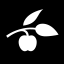
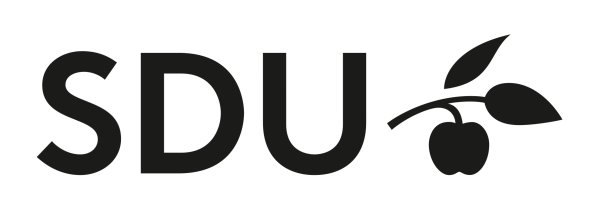

In [18]:
from tool_validation import validate_tools
valid_tools, problem_tools = validate_tools(processed_tools, token)

**Identify preprints**

7. Check if there are any newly published tools in _preprints_file_, and return only those with updated _publication_link_ and _is_preprint_ flag. Function will delete published preprints from _preprints_file_.

In [20]:
from preprints import identify_preprints
pubs_prp = identify_preprints(rerun = True, tools = None, json_prp= preprints_file)

Loaded 1001 preprints from C:/Users/Lenovo/bio-tools/bio-tools-curation-tooling/data/preprints.json.
There are 13 newly published tools. 988 preprints remaining.


8. Repeat identification for validated tools. Return only publications. Function will update _preprints_file_ with identified preprints.

In [22]:
pubs = identify_preprints(rerun = False, tools = valid_tools, json_prp= preprints_file)

Loaded 988 preprints from C:/Users/Lenovo/bio-tools/bio-tools-curation-tooling/data/preprints.json.


ERROR:root:Invalid response format.
ERROR:root:Invalid response format.
ERROR:root:Invalid response format.
ERROR:root:Invalid response format.


There are 287 published tools and 96 preprints.


**Create .csv file**

9. Generate csv file from _to_curate_ first _pubs_ and all _pubs_prp_

    Returns:
    
    * _tools_to_add_: tools to add to database 
    * _tools_left_: tools not in _tools_to_add.

In [33]:
from utils.utils import check_date
from utils.csv_utils import generate_csv

file_date = check_date(pub2tools_log)
tools_to_add, tools_left = generate_csv(pubs, pubs_prp, to_curate, file_date)



**Create json files**


9. Generate json files with tools that will not be curated

In [34]:
from utils.json_utils import generate_json

generate_json(tools_left, file_date)

JSON files generated in c:\Users\Lenovo\bio-tools\bio-tools-curation-tooling\data.


10. **Add tools to curate to dev**

In [ ]:
from biotools_dev import add_tools

add_tools(tools_to_add, token, WRITE_TO_DB=True)
